# Question 3 Real life dataset
Mandana Samiei 
ID: 260779555

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
from pandas import read_csv
from numpy.linalg import inv
from numpy import genfromtxt
from math import exp
import random
%matplotlib inline  

def load_data(file_name):
    my_data = genfromtxt(file_name, delimiter=',')
    np.random.shuffle(my_data)
    #print my_data.shape
    X = my_data[:,0:127]
    #print X.shape
    Y = my_data[:,127]
    #print Y.shape
    return X,Y

def load_new_data(file_name):
    my_data = genfromtxt(file_name, delimiter=',')
    np.random.shuffle(my_data)
    X = my_data[:,0:121]
    Y = my_data[:,122]
    return X,Y

# Fill the missing values with the mean of each column

In [128]:
def fill_data(X):
    no_missing_features = []
    features_mean = []
    print "\n\n**********************************PART 1: Fill the missing values****************************\n\n"
    print "_____________________________Features Specification________________________"
    for i in range(X.shape[1]):
        print "\n____________________________feature number:{}____________________________" .format(i)
        features = X[:,i]
        print "size of feature {} before delete NaNs:{}" .format(i,features.size)
        print "Before Delete NaNs:{}" .format(features)
        feat_nan_indeices = np.argwhere(np.isnan(features))
        print "number of nan for this feature:{}" .format(feat_nan_indeices.size)
        new_features = np.delete(features,feat_nan_indeices)
        print "Size of feature {} column after delete NaNs:{}" .format(i,new_features.size)
        print "After Delete NaNs:{}" .format(new_features)
        mean = np.mean(new_features)
        if (np.isnan(mean)):
            mean = 0.0
        features_mean.append(mean)
        features[feat_nan_indeices] = mean
        X[:,i] = features
        #Finding featuresh without any missing 
        if (features.size == new_features.size):
            no_missing_features.append(i)
    print "\nThe number of all no-missing features: {}" .format(len(no_missing_features))
    print "\n__________________Data after replacing all nan elements:__________________\n\n{}".format(X)
    print "\nData shape:{}" .format(X.shape)
    print "\nTo check if there is any other Nan(exisiting Nan indices):{}" .format(np.argwhere(np.isnan(X)))
    if (np.argwhere(np.isnan(X)).size == 0):
         print "\n^^^^^^^^^^^^^Congratulation!^^^^^^^^^^^^\n\n-------There is no other NaN element in the dataset!--------"
    return X

# Split Data and Save in 5 files

In [129]:
def split_data(X,fold):
    print "\n\n*******************PART 2 - Split Data and Save each split as a dataset for train and validation*****************\n\n"
    #remove 5 non-predictive 
    new_data = X[:,4:]
    splitted_data = {}
    k = 0 
    for i in range(fold):
        j = 399*(i+1)
        split = new_data[k:j,:]
        k = j
        splitted_data[i] = split
    print "\n_______________________________________DONE! Data is splitted_____________________________________\n"
    fold0_train = np.concatenate((np.concatenate((np.concatenate((splitted_data[1],splitted_data[2]),axis=0),splitted_data[3]),axis=0),splitted_data[4]),axis=0)
    fold1_train = np.concatenate((np.concatenate((np.concatenate((splitted_data[0],splitted_data[2]),axis=0),splitted_data[3]),axis=0),splitted_data[4]),axis=0)
    fold2_train = np.concatenate((np.concatenate((np.concatenate((splitted_data[3],splitted_data[4]),axis=0),splitted_data[0]),axis=0),splitted_data[1]),axis=0)
    fold3_train = np.concatenate((np.concatenate((np.concatenate((splitted_data[4],splitted_data[0]),axis=0),splitted_data[1]),axis=0),splitted_data[2]),axis=0)
    fold4_train = np.concatenate((np.concatenate((np.concatenate((splitted_data[0],splitted_data[1]),axis=0),splitted_data[2]),axis=0),splitted_data[3]),axis=0)
    print "_________________________________FOLD 0______________________________________"
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k0/CandC_valid0.csv", splitted_data[0], fmt='%15s', delimiter=',') 
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k0/CandC_train0.csv", fold0_train, fmt='%15s', delimiter=',') 
    print "_________________________________FOLD 1______________________________________"
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k1/CandC_valid1.csv", splitted_data[1], fmt='%15s', delimiter=',') 
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k1/CandC_train1.csv", fold1_train, fmt='%15s', delimiter=',') 
    print "_________________________________FOLD 2______________________________________"
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k2/CandC_valid2.csv", splitted_data[2], fmt='%15s', delimiter=',') 
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k2/CandC_train2.csv", fold2_train, fmt='%15s', delimiter=',') 
    print "_________________________________FOLD 3______________________________________"
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k3/CandC_valid3.csv", splitted_data[3], fmt='%15s', delimiter=',') 
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k3/CandC_train3.csv", fold3_train, fmt='%15s', delimiter=',') 
    print "_________________________________FOLD 4______________________________________"
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k4/CandC_valid4.csv", splitted_data[4], fmt='%15s', delimiter=',') 
    np.savetxt("hwk1_datasets/Datasets/Q3.2_dataset/k4/CandC_train4.csv", fold4_train, fmt='%15s', delimiter=',')    
    

Linear Regression Class

In [130]:
class LinearRegression(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def train_closeform(self, x, y ,v_x, v_y):
        self.valid_x = v_x
        self.valid_y = v_y
        self.train_x = x
        self.train_y = y
        self.train_close()
        t_mse, v_mse = self.compute_loss()
        return t_mse, v_mse
    def gen_features(self,x,degree=1):
        ones = np.ones((x.shape[0],1))
        features = np.concatenate((ones,x), axis=1)
        return features
    def train_close(self):
        self.feat = self.gen_features(self.train_x)
        self.w = np.dot(np.dot(inv(np.dot(self.feat.T, self.feat)), self.feat.T), self.train_y)
        print "\nLearned Parameters(W):\n{}".format(self.w)
    def predict(self, X, w):
        y = np.dot(X, w)
        return y
    def compute_loss(self,degree=1):
        train_mse = ((np.dot(self.feat, self.w) - self.train_y)**2).mean(axis=0)
        valid_mse = ((np.dot(self.gen_features(self.valid_x,degree), self.w) - self.valid_y)**2).mean(axis=0)
        print "\nTrain MSE:{}, Valid MSE:{}".format(train_mse, valid_mse)
        return train_mse, valid_mse

In [131]:
class RidgeReg(LinearRegression):
    def __init__(self, *args, **kwargs):
        super(RidgeReg, self).__init__(*args, **kwargs)
    def l2_regularization(self,x, y, lambda_):
        self.feat = self.gen_features(x)
        I = np.identity(self.feat.shape[1])
        self.w_ridge = np.dot(np.dot(inv((np.dot(self.feat.T, self.feat)+(lambda_*I))), self.feat.T), y)
        print "\nParameters W_ridge after L2 regularization corresponding to Lambda {} is: \n {} " .format(lambda_, self.w_ridge)
        return self.w_ridge;
    def compute_reg_loss(self, x, y, valid_x, valid_y, lambda_):
        train_mse = ((np.dot(self.gen_features(x), self.w_ridge) - y)**2).mean(axis=0) + lambda_*(np.dot(self.w_ridge.T,self.w_ridge))
        valid_mse = ((np.dot(self.gen_features(valid_x), self.w_ridge) - valid_y)**2).mean(axis=0)+ lambda_*(np.dot(self.w_ridge.T,self.w_ridge))
        print "After Regularization with lambda {}:\n Train MSE:{}, Valid MSE:{}".format(lambda_,train_mse, valid_mse)
        return train_mse, valid_mse

# Main Function



**********************************PART 1: Fill the missing values****************************


_____________________________Features Specification________________________

____________________________feature number:0____________________________
size of feature 0 before delete NaNs:1994
Before Delete NaNs:[ 41.  28.  47. ...,  54.  53.  34.]
number of nan for this feature:0
Size of feature 0 column after delete NaNs:1994
After Delete NaNs:[ 41.  28.  47. ...,  54.  53.  34.]

____________________________feature number:1____________________________
size of feature 1 before delete NaNs:1994
Before Delete NaNs:[ nan  nan  nan ...,  nan  nan   3.]
number of nan for this feature:1174
Size of feature 1 column after delete NaNs:820
After Delete NaNs:[   7.   79.   21.    9.   19.   21.   11.   17.    7.  133.   35.    7.
   79.   35.   15.   49.   17.   53.  141.    3.   61.   21.  750.    3.
    9.   45.   91.    7.   15.   11.   41.    5.   11.    3.   13.   17.
    7.   29.   23.   41.  

After Delete NaNs:[ 0.3   0.73  0.5  ...,  0.45  0.3   0.15]

____________________________feature number:36____________________________
size of feature 36 before delete NaNs:1994
Before Delete NaNs:[ 0.25  0.29  0.41 ...,  0.17  0.19  0.71]
number of nan for this feature:0
Size of feature 36 column after delete NaNs:1994
After Delete NaNs:[ 0.25  0.29  0.41 ...,  0.17  0.19  0.71]

____________________________feature number:37____________________________
size of feature 37 before delete NaNs:1994
Before Delete NaNs:[ 0.37  0.77  0.41 ...,  0.42  0.47  0.21]
number of nan for this feature:0
Size of feature 37 column after delete NaNs:1994
After Delete NaNs:[ 0.37  0.77  0.41 ...,  0.42  0.47  0.21]

____________________________feature number:38____________________________
size of feature 38 before delete NaNs:1994
Before Delete NaNs:[ 0.43  0.23  0.37 ...,  0.22  0.47  0.73]
number of nan for this feature:0
Size of feature 38 column after delete NaNs:1994
After Delete NaNs:[ 0.43  0.23 

size of feature 116 before delete NaNs:1994
Before Delete NaNs:[  nan   nan  0.43 ...,   nan   nan   nan]
number of nan for this feature:1675
Size of feature 116 column after delete NaNs:319
After Delete NaNs:[ 0.43  0.5   0.71  0.71  0.36  0.14  0.36  0.43  0.36  0.64  0.71  0.57
  0.29  0.64  0.71  0.64  0.36  0.43  0.5   0.36  0.57  0.43  0.71  0.5
  0.71  0.5   0.57  0.29  0.43  0.93  0.64  0.57  0.14  0.86  0.79  0.57
  0.93  0.57  0.5   0.43  0.64  0.43  0.29  0.29  0.64  0.93  0.86  0.43
  0.64  0.43  0.79  0.93  0.29  0.5   0.43  0.57  0.57  0.64  0.43  0.29
  0.57  0.07  0.57  0.57  0.21  0.64  0.36  0.71  0.64  0.29  0.86  0.79
  0.43  0.57  0.57  0.71  0.14  0.21  0.64  0.64  0.29  0.5   0.64  0.57
  0.64  0.64  0.64  0.71  0.36  0.5   0.64  0.43  0.5   0.64  0.43  0.29
  0.36  0.57  0.57  0.64  0.5   0.43  0.5   0.93  0.79  0.57  0.5   0.57
  0.71  0.29  0.43  0.86  0.86  0.79  0.93  0.64  0.93  0.5   0.43  0.57
  0.71  0.5   0.57  0.36  0.64  0.5   0.64  0.14  0.86  0.79  

_________________________________FOLD 2______________________________________
_________________________________FOLD 3______________________________________
_________________________________FOLD 4______________________________________

_________________________Model Training for run 0_____________________


Learned Parameters(W):
[  2.59732623e-01   1.08188666e-05  -5.52567142e-02  -4.48610385e-03
   7.97505996e-03   2.04620308e-02  -1.48142531e-02  -1.33152555e-03
   8.35788956e-04  -7.39256535e-02   4.13051399e-02  -1.43733474e-04
   6.68045735e-02  -3.18884238e-03  -8.82422332e-02   8.78651153e-03
   1.89991685e-03   3.79845121e-03  -4.00651667e-02   1.10968011e-02
   9.24783711e-04   6.19639338e-02   2.10208863e-03   9.03627738e-03
   2.73033239e-04   1.23699437e-03   1.78056308e-03   6.50180757e-05
  -1.31985904e-04  -6.43255480e-02  -2.32888044e-02  -9.26040899e-03
   5.77550743e-03  -2.52515364e-02  -1.63077471e-02  -1.88835292e-02
   7.21657346e-03   9.58284495e-03  -1.55741744e


_________________________Model Training for run 4_____________________


Learned Parameters(W):
[  1.38610687e+00  -1.13809838e-04   2.65956886e-03  -1.92968011e-02
   1.06873673e-02   1.31832561e-02  -8.54446748e-03  -6.07437748e-03
  -2.85189896e-02  -4.73163055e-02   4.18037160e-02  -1.34609013e-02
   8.26640262e-02  -6.47344784e-03  -3.66573979e-02   1.02402586e-03
   1.68065733e-03   1.18957084e-02  -2.54193195e-02   4.20557324e-04
   2.29974828e-03   2.43051527e-02   1.94546042e-02  -2.07562907e-02
  -1.61935697e-03   3.26329127e-03  -3.86035943e-04  -8.85476395e-05
  -6.21703991e-03  -1.05268204e-01  -1.39146263e-02   2.36536919e-04
  -1.06934320e-02  -2.75316654e-02  -6.38926359e-03  -2.20619768e-02
   6.85579242e-03   7.34439036e-03  -2.90349225e-03   7.17104987e-03
  -6.48425912e-02   7.76136562e-03  -2.89218714e-02   6.83663031e-02
   9.08855458e-03  -2.86838776e-02   1.14148114e-02   1.48162055e-02
   2.76081819e-03   5.02933631e-03  -3.05901186e-04   1.92539879e-01
  -6.5

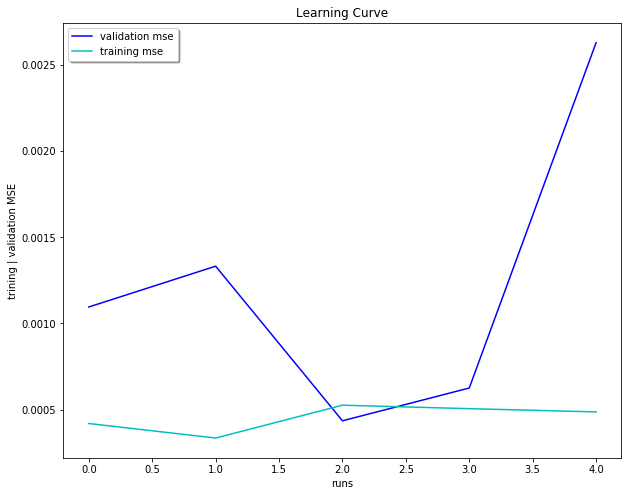



_________________________________________________________________________________________

_______The Average of Training MSE of 5 folds cross validation is: 0.000454920006795

_______The Average of Validation MSE of 5 folds cross validation is: 0.00122352506108


__________________________________Ridge Regularization____________________________________________

_________________________Model Training for run 0 with lambda:0_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0 is: 
 [  2.59732623e-01   1.08188670e-05  -5.52567148e-02  -4.48610369e-03
   7.97505991e-03   2.04620308e-02  -1.48142532e-02  -1.33152558e-03
   8.35788707e-04  -7.39256538e-02   4.13051404e-02  -1.43733305e-04
   6.68045740e-02  -3.18884239e-03  -8.82422330e-02   8.78651170e-03
   1.89991685e-03   3.79845118e-03  -4.00651668e-02   1.10968011e-02
   9.24783712e-04   6.19639339e-02   2.10208842e-03   9.03627743e-03
   2.73033233e-04   1.23699437e-03   1.78056309e-03   6.5


_________________________Model Training for run 4 with lambda:0_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0 is: 
 [  1.38610598e+00  -1.13809733e-04   2.65799989e-03  -1.92964304e-02
   1.06871567e-02   1.31830255e-02  -8.54447674e-03  -6.07444607e-03
  -2.85190066e-02  -4.73156266e-02   4.18033234e-02  -1.34607172e-02
   8.26658145e-02  -6.47349253e-03  -3.66595327e-02   1.02418533e-03
   1.68063826e-03   1.18958569e-02  -2.54191520e-02   4.20571388e-04
   2.29975570e-03   2.43063727e-02   1.94551275e-02  -2.07564404e-02
  -1.61931705e-03   3.26330518e-03  -3.86038640e-04  -8.85498217e-05
  -6.21700989e-03  -1.05268221e-01  -1.39147119e-02   2.36670738e-04
  -1.06935519e-02  -2.75318112e-02  -6.38926109e-03  -2.20618248e-02
   6.85581273e-03   7.34435792e-03  -2.90344371e-03   7.17138543e-03
  -6.48421898e-02   7.76120063e-03  -2.89212714e-02   6.83654603e-02
   9.08791401e-03  -2.86839891e-02   1.14148742e-02   1.48161590e-02
   2.7608


_________________________Model Training for run 3 with lambda:0.1_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.1 is: 
 [  2.10399874e-02  -8.53066472e-05   2.42511715e-02  -3.79165842e-03
   1.28869335e-02   2.39725003e-02  -1.05988502e-02  -1.11386685e-02
   8.37719577e-03  -5.35155395e-02   6.24501461e-03  -2.58084711e-02
   1.76583097e-02  -3.85372351e-03  -7.44828073e-02   6.90268716e-03
   9.36511183e-04   3.82353415e-03  -1.50622512e-02   1.49309389e-02
   4.38509470e-03   5.75681748e-02   9.84196358e-03   3.93704167e-03
  -1.53849951e-03   5.88078664e-03   1.38377409e-03  -6.58926745e-04
  -4.95868107e-03  -9.89346345e-03  -2.42653910e-02  -7.95034703e-04
  -8.30304169e-03  -3.48416305e-02  -1.51981813e-02  -1.16599672e-02
   1.08463300e-02   1.08386966e-02  -1.10641138e-03   1.08128181e-02
  -5.50700137e-02   5.56333981e-03  -9.31923020e-03   3.26121504e-02
  -2.60032144e-03  -5.18142355e-02   3.48537631e-02   2.42386818e-02
   1.


_________________________Model Training for run 2 with lambda:0.2_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.2 is: 
 [ -1.55605708e-02   2.75898904e-05   4.10702711e-03  -6.59904707e-03
   1.06968007e-02   2.14266641e-02  -1.60260678e-02  -1.24254409e-02
   1.82821091e-02  -6.74813312e-02   4.55435923e-03  -1.49917334e-02
   1.90257620e-02  -3.40652062e-03  -5.08250528e-02   4.93728175e-03
  -3.74064694e-04   3.29564156e-03  -1.49995493e-02   1.83897229e-02
  -4.97344468e-03   4.81330147e-02   1.08536404e-02  -5.45946615e-03
  -3.31358827e-04   3.05593314e-03   1.70694240e-03  -8.01706113e-04
  -1.91905223e-03  -3.90436419e-02  -2.33922671e-02  -3.52135694e-03
  -2.56662680e-03  -2.50827790e-02  -1.37951043e-02  -1.24484163e-02
   7.22217204e-03   1.06355263e-02  -3.78414074e-03  -1.76765262e-03
  -3.07023492e-02   1.97839981e-02   8.88461007e-03   9.96808348e-03
  -1.21611357e-02  -4.67189108e-02   5.17398998e-02   2.68867462e-02
   9.


_________________________Model Training for run 1 with lambda:0.3_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.3 is: 
 [ -4.96696274e-02  -7.47762273e-05  -1.46134097e-03   4.71321421e-03
   1.53740417e-02   1.76687754e-02  -9.31071101e-03  -1.05475030e-02
   2.73090585e-03  -2.32888742e-02   2.31988554e-03  -1.65731351e-02
   1.02956892e-02  -4.02775134e-03  -2.42386274e-02  -1.20890082e-02
   1.29194506e-03  -5.71547064e-03   3.42638445e-04   5.61601112e-03
  -4.95830145e-03   5.51254228e-02   2.23538905e-03  -2.21655788e-03
  -1.50825093e-04   2.54696968e-03  -1.22019039e-03   6.72730608e-05
  -1.60619546e-03  -2.97614774e-02   1.04062572e-03  -3.83821837e-03
  -1.31107599e-02  -2.60704592e-02  -9.83489682e-03  -7.48619992e-03
   3.65473968e-03   3.00575707e-03   1.33990606e-02   1.16960610e-02
  -2.12601948e-02   6.68861829e-03   4.45316663e-03   1.92493857e-02
  -6.89520069e-06  -2.44469806e-02   3.36906463e-02   1.41963330e-02
   6.


_________________________Model Training for run 0 with lambda:0.4_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.4 is: 
 [  3.69535893e-02  -8.67832290e-05  -2.03541931e-03  -1.08836800e-02
   1.71288491e-02   2.59075101e-02  -1.18129123e-02   3.73595588e-03
   2.09716991e-02  -3.57815776e-02  -7.58541737e-03  -3.35113125e-03
   1.09061692e-02  -2.06821263e-03  -4.43205556e-02   7.38000525e-03
   3.34218959e-03   1.22039499e-02  -2.47779180e-02   2.14826305e-02
  -1.42025640e-03   3.90706112e-02   2.87850616e-02  -2.18949630e-02
  -5.81636445e-04   1.76336780e-03   1.11106559e-03  -8.63303151e-04
  -1.00282648e-03  -2.78968380e-03  -2.91400443e-02  -7.26683984e-03
  -1.53278051e-03  -2.52875230e-02  -1.69706808e-02  -1.25046210e-02
   5.61110577e-03   1.42351766e-02   3.81518680e-04   4.76010594e-03
  -3.55639795e-02   9.82561213e-03   5.10629426e-03   8.29466125e-03
   1.19551031e-02  -2.64672056e-02   1.56447142e-02   2.25268363e-02
   4.


_________________________Model Training for run 4 with lambda:0.4_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.4 is: 
 [ -5.92191348e-04  -1.28767256e-04   9.08987649e-03  -1.77626315e-02
   1.54424221e-02   1.67432702e-02  -7.88512495e-03  -7.04691348e-03
  -2.79944471e-03  -2.40246686e-02   1.92012250e-04  -2.25857211e-02
   1.94829943e-02  -5.62167186e-03  -1.32452594e-02   3.36836948e-04
   1.77601544e-03   1.50814185e-02  -1.37040701e-02   9.29742266e-03
   2.64156226e-03   1.41787449e-02   1.58709397e-02  -1.14462305e-02
  -4.24052471e-03   5.31682485e-03   2.53000987e-04  -1.34300862e-03
  -6.54656361e-03  -3.93740102e-02  -2.50968726e-02  -3.58671225e-03
  -7.91656419e-03  -2.42281631e-02  -1.26371495e-02  -1.73905843e-02
   7.73517245e-03   1.24477621e-02  -5.20112470e-03  -3.16434072e-03
  -3.34072943e-02   1.26811937e-02   5.93659602e-03   4.68065342e-03
  -1.59362024e-03  -2.54623163e-02   1.55177829e-02   1.63039201e-02
   5.


_________________________Model Training for run 3 with lambda:0.5_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.5 is: 
 [  1.15697929e-02  -2.95980107e-05   5.07775281e-03  -5.97773660e-03
   1.23764357e-02   2.10251611e-02  -1.01480039e-02  -8.28992130e-03
   1.31196005e-02  -3.17286386e-02  -1.25446615e-02  -2.10489386e-02
   8.54870227e-03  -4.30332890e-03  -3.97643071e-02   4.89907335e-03
   1.72194042e-03   5.77663334e-03  -9.56142379e-03   1.84577100e-02
   2.99528757e-03   3.75739406e-02   1.68578436e-02  -7.89827471e-03
  -2.56616045e-03   6.07264679e-03   2.30425455e-03  -6.52856244e-04
  -5.05690522e-03   2.71232239e-03  -2.28584994e-02  -2.17371371e-03
  -8.56696729e-03  -2.64700817e-02  -1.62479716e-02  -9.55568008e-03
   1.01355272e-02   1.20697173e-02  -1.20874126e-03   3.35263002e-03
  -3.72499950e-02   9.01523595e-03   5.64547451e-03   6.20913645e-03
  -7.22462802e-03  -3.09968219e-02   2.16261100e-02   2.37530734e-02
   9.


_________________________Model Training for run 2 with lambda:0.6_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.6 is: 
 [  6.56691390e-03   6.79230804e-05   4.22283768e-04  -6.00959897e-03
   1.02388367e-02   2.18935950e-02  -1.40755500e-02  -9.95388171e-03
   1.96105189e-02  -4.44526966e-02  -1.02453055e-02  -1.06819008e-02
   8.72320281e-03  -3.71509094e-03  -2.75708998e-02   1.98694200e-03
  -1.12237857e-05   4.92648699e-03  -1.15317672e-02   1.88309433e-02
  -5.70105452e-03   3.14542451e-02   1.13947607e-02  -5.23174591e-03
  -6.00268434e-04   3.53474189e-03   2.32406558e-03  -6.06398287e-04
  -1.98281026e-03  -1.90363591e-02  -2.29540161e-02  -3.62807114e-03
  -3.98158130e-03  -2.18816198e-02  -1.52641281e-02  -1.07919179e-02
   6.64571086e-03   1.02821390e-02  -3.11165717e-03  -3.77017391e-03
  -2.33145760e-02   2.18816001e-02   1.13573020e-02   3.88826376e-03
  -8.41979826e-03  -2.98726564e-02   3.62619374e-02   2.61751944e-02
   1.


_________________________Model Training for run 1 with lambda:0.7_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.7 is: 
 [ -2.36028464e-02  -7.93287572e-05  -3.34464644e-03   2.32291822e-03
   1.52406504e-02   1.60209944e-02  -8.78135189e-03  -8.87931593e-03
   2.75514769e-03  -1.56948238e-02  -2.07589304e-03  -1.34895069e-02
   3.44910925e-03  -4.32937232e-03  -1.15638190e-02  -1.29967094e-02
   1.48929915e-03  -3.87402383e-03  -1.39770586e-03   6.62381005e-03
  -5.37528474e-03   4.06516377e-02   4.57823509e-03  -2.94734781e-03
  -7.70053465e-04   2.81736886e-03  -6.04775707e-04   1.49043755e-04
  -1.25764648e-03  -1.56863447e-02  -1.96986985e-03  -4.09665216e-03
  -1.17340009e-02  -2.09611507e-02  -1.11371922e-02  -8.66443922e-03
   3.66224174e-03   3.12899866e-03   1.23155976e-02   6.94192411e-03
  -1.54714272e-02   8.35859323e-03   8.16544532e-03   1.14858197e-02
  -1.82629485e-03  -1.52641310e-02   2.35295582e-02   1.37911700e-02
   5.


_________________________Model Training for run 0 with lambda:0.8_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.8 is: 
 [  3.33373163e-02  -8.28759932e-05   9.35349127e-05  -1.09660324e-02
   1.71704720e-02   2.77262570e-02  -1.09423960e-02   4.92917730e-03
   1.72330930e-02  -2.46506815e-02  -9.78373637e-03  -1.84626008e-03
   7.53199249e-03  -2.31957226e-03  -2.85287789e-02   7.14188462e-03
   3.74632320e-03   1.37545575e-02  -1.86667673e-02   2.26665455e-02
  -5.84649493e-04   2.87004031e-02   1.99743566e-02  -1.41213913e-02
  -2.03788607e-05   2.16798500e-03   1.81476724e-03  -1.01780080e-03
  -1.03384332e-03   8.40764898e-04  -2.58831188e-02  -6.91968046e-03
  -2.57168523e-03  -2.21324649e-02  -1.65882119e-02  -8.90863018e-03
   5.12155075e-03   1.40913658e-02   8.91282348e-04   3.65060487e-03
  -2.90243019e-02   1.01198989e-02   7.76135992e-03   4.05320216e-03
   7.06789133e-03  -1.87841237e-02   1.05558559e-02   2.18310133e-02
   3.


_________________________Model Training for run 4 with lambda:0.8_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.8 is: 
 [  8.78116422e-03  -1.00205157e-04   6.57851636e-03  -1.47584019e-02
   1.46150569e-02   1.67154543e-02  -7.28690021e-03  -4.80584910e-03
  -1.23124027e-03  -1.65182689e-02  -4.77597352e-03  -1.80421910e-02
   1.25750812e-02  -5.67591538e-03  -7.65137772e-03   1.32268123e-03
   1.96047929e-03   1.57773018e-02  -1.12729014e-02   1.02559885e-02
   3.47266957e-03   1.08295352e-02   1.30577035e-02  -7.44767862e-03
  -4.66283902e-03   5.69883012e-03   9.80802582e-04  -1.51211933e-03
  -6.73596237e-03  -2.81598447e-02  -2.37416768e-02  -4.37942495e-03
  -7.14927347e-03  -2.12004878e-02  -1.30202264e-02  -1.36147970e-02
   7.51626665e-03   1.26572393e-02  -4.65463558e-03  -4.38629504e-03
  -2.71715627e-02   1.22381298e-02   7.57111503e-03   9.93724272e-04
  -1.22674494e-03  -1.84538561e-02   1.00367145e-02   1.59090319e-02
   5.


_________________________Model Training for run 3 with lambda:0.9_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 0.9 is: 
 [  1.41359982e-02   3.26314711e-06   2.21754860e-03  -5.91048700e-03
   1.15413084e-02   2.03513639e-02  -9.48333511e-03  -6.50260222e-03
   1.03735874e-02  -2.33269223e-02  -1.38683624e-02  -1.59042959e-02
   5.04634638e-03  -4.44660052e-03  -2.66137898e-02   4.01480778e-03
   2.26056854e-03   7.09521464e-03  -7.61957449e-03   1.87453759e-02
   2.57831535e-03   2.88369709e-02   1.42160114e-02  -7.14658286e-03
  -2.78525652e-03   6.21546214e-03   3.01578023e-03  -5.22133653e-04
  -4.92307978e-03   3.36678529e-03  -2.04542921e-02  -3.26631678e-03
  -8.09052895e-03  -2.22229432e-02  -1.61751559e-02  -7.81419698e-03
   9.59943672e-03   1.20240669e-02  -6.99625700e-04   1.17634200e-03
  -3.04911887e-02   9.40681195e-03   7.50086448e-03   2.36568408e-03
  -6.41362828e-03  -2.16237759e-02   1.41793354e-02   2.26776202e-02
   7.


_________________________Model Training for run 2 with lambda:1_____________________


Parameters W_ridge after L2 regularization corresponding to Lambda 1 is: 
 [  1.08475060e-02   9.44036037e-05  -4.82862774e-04  -5.26545959e-03
   9.69412569e-03   2.21139305e-02  -1.29006976e-02  -8.79469722e-03
   1.66245867e-02  -3.37021071e-02  -1.20931937e-02  -7.48782172e-03
   5.12057323e-03  -3.89936819e-03  -1.87158261e-02   9.04030863e-04
   2.62226073e-04   5.97387850e-03  -9.44031075e-03   1.81626867e-02
  -5.68444030e-03   2.43439419e-02   1.04810479e-02  -3.44982832e-03
  -8.08824659e-04   3.82800084e-03   2.73058309e-03  -3.75628430e-04
  -2.07219251e-03  -1.29054869e-02  -2.11788077e-02  -3.79445713e-03
  -4.31737381e-03  -1.98347940e-02  -1.58713985e-02  -9.39331838e-03
   6.29403584e-03   9.83882539e-03  -2.60169513e-03  -3.91345794e-03
  -1.87976052e-02   2.10647221e-02   1.11283058e-02   2.75271455e-03
  -5.67597319e-03  -2.19569803e-02   2.74141157e-02   2.52146196e-02
   9.9892

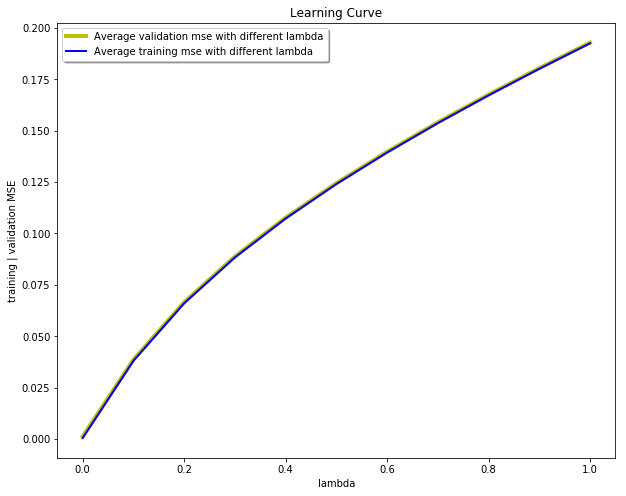

In [132]:
X,Y = load_data('hwk1_datasets/Datasets/communities.data.txt')
new_X = fill_data(X)
split_data(new_X,5)
model_1 = LinearRegression(X,Y)
valid_mse = []
train_mse = []
colors=['r', 'c', 'g', 'k', '#F9690E']

for i in range(5):
    valid_x, valid_y = load_new_data("hwk1_datasets/Datasets/Q3.2_dataset/k{}/CandC_valid{}.csv".format(i,i))
    train_x, train_y = load_new_data("hwk1_datasets/Datasets/Q3.2_dataset/k{}/CandC_train{}.csv".format(i,i))
    print "\n_________________________Model Training for run {}_____________________\n".format(i)
    t_mse,v_mse = model_1.train_closeform(train_x, train_y, valid_x, valid_y)
    print "\n\n______________________________________________________________________________________"
    valid_mse.append(v_mse)
    train_mse.append(t_mse)
ax, fig = plt.subplots(0,figsize=(10,8))
x_range = np.arange(5)
plt.plot(x_range, valid_mse, color='b', label="validation mse")
plt.plot(x_range, train_mse, color='c', label="training mse")
plt.ylabel('trining | validation MSE')
plt.xlabel('runs')
plt.title('Learning Curve')
legend = plt.legend(loc='best', shadow=True)
plt.show()
    
print "\n\n_________________________________________________________________________________________"
print "\n_______The Average of Training MSE of 5 folds cross validation is: {}" .format(np.mean(train_mse))
print "\n_______The Average of Validation MSE of 5 folds cross validation is: {}" .format(np.mean(valid_mse))

print "\n\n__________________________________Ridge Regularization____________________________________________"
model_2 = RidgeReg(new_X,Y)
lambda_ = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
vmse_lambda = []
tmse_lambda = []
for j in range(len(lambda_)):
    for i in range(5):
        valid_x, valid_y = load_new_data("hwk1_datasets/Datasets/Q3.2_dataset/k{}/CandC_valid{}.csv".format(i,i))
        train_x, train_y = load_new_data("hwk1_datasets/Datasets/Q3.2_dataset/k{}/CandC_train{}.csv".format(i,i))   
        print "\n_________________________Model Training for run {} with lambda:{}_____________________\n".format(i,lambda_[j])
        model_2.l2_regularization(train_x,train_y,lambda_[j])
        t_mse,v_mse = model_2.compute_reg_loss(train_x, train_y, valid_x, valid_y,lambda_[j])
        valid_mse.append(v_mse)
        train_mse.append(t_mse)
    vmse_lambda.append(np.mean(valid_mse))
    tmse_lambda.append(np.mean(train_mse))
    print "Average validation error over 5 runs {} with lambda:{}".format(np.mean(valid_mse),lambda_[j])
    print "Average training error over 5 runs {} with lambda:{}".format(np.mean(train_mse),lambda_[j])
ax, fig = plt.subplots(0,figsize=(10,8))   
plt.plot(lambda_, vmse_lambda, color='y', label="Average validation mse with different lambda",linewidth=4.0 )
plt.plot(lambda_, tmse_lambda, color='b', label="Average training mse with different lambda", linewidth=2.0)
plt.ylabel('training | validation MSE')
plt.xlabel('lambda')
plt.title('Learning Curve')
legend = plt.legend(loc='best', shadow=True)
plt.show()